In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# nuestro primer polinomio de Lagrange

In [39]:
x = np.array([-1,0,1,2]) # x1, x2, x3, x4
y = np.array([1,1,1.1,1]) # y1, y2, y3, y4

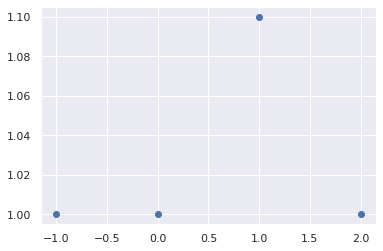

In [40]:
plt.scatter(x,y)

In [55]:
def poly_lagrange(x, vec_x, vec_y, n):
    # n comienza desde 1
    x_interes = vec_x[n-1]
    f = vec_y[n-1]
    pl = []
    for x_i in x:
        lista = np.array([(x_i-x_j)/(x_interes-x_j) for x_j in vec_x if x_j != x_interes])
        pl.append(np.prod(lista)*f)
    return np.array(pl)
## Deuda pendiente de vectorizacion
plagrange = np.vectorize(poly_lagrange, excluded=['n'])

In [41]:
p1 = lambda x, x1, x2, x3, x4, f: (x-x2)*(x-x3)*(x-x4)*f/((x1-x2)*(x1-x3)*(x1-x4)) # f == f(x1)
p1_v = np.vectorize(p1, excluded=['x1','x2','x3','x4','f'])
p2 = lambda x, x1, x2, x3, x4, f: (x-x1)*(x-x3)*(x-x4)*f/((x2-x1)*(x2-x3)*(x2-x4)) # f == f(x1)
p2_v = np.vectorize(p2, excluded=['x1','x2','x3','x4','f'])
p3 = lambda x, x1, x2, x3, x4, f: (x-x1)*(x-x2)*(x-x4)*f/((x3-x1)*(x3-x2)*(x3-x4)) # f == f(x1)
p3_v = np.vectorize(p3, excluded=['x1','x2','x3','x4','f'])
p4 = lambda x, x1, x2, x3, x4, f: (x-x1)*(x-x2)*(x-x3)*f/((x4-x1)*(x4-x2)*(x4-x3)) # f == f(x1)
p4_v = np.vectorize(p4, excluded=['x1','x2','x3','x4','f'])

In [42]:
X = np.linspace(-1,2,1000)
y_p1 = p1_v(X, x[0], x[1], x[2], x[3], y[0])
y_p2 = p2_v(X, x[0], x[1], x[2], x[3], y[1])
y_p3 = p3_v(X, x[0], x[1], x[2], x[3], y[2])
y_p4 = p4_v(X, x[0], x[1], x[2], x[3], y[3])

In [56]:
y_l1 = poly_lagrange(X, x, y, 1)

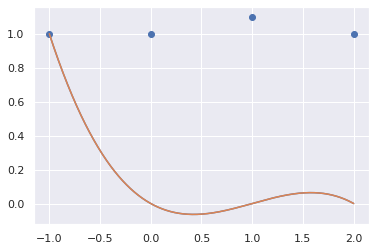

In [57]:
plt.scatter(x,y)
# plt.plot(X,y_p2)
# plt.plot(X,y_p3)
# plt.plot(X,y_p4)
plt.plot(X,y_l1)

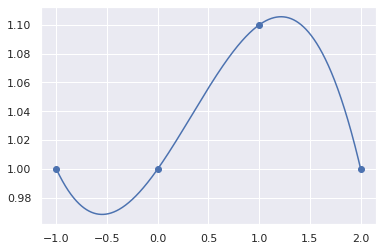

In [44]:
plt.scatter(x,y)
plt.plot(X,y_p1+y_p2+y_p3+y_p4)

# nuevo ejercicio

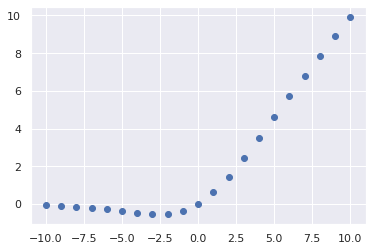

In [60]:
x1 = np.linspace(-10,10,21)
y1 = x1/(1+np.exp(-x1/2))
plt.scatter(x1,y1)

In [68]:
X_l = np.linspace(-10,10,30)
Y_l = np.sum([poly_lagrange(X_l, x1, y1, n) for n in range(1,22,1)], axis=0)

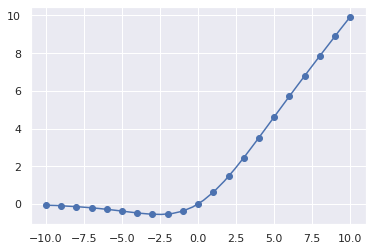

In [69]:
plt.scatter(x1,y1)
plt.plot(X_l, Y_l)
# Cuando el comportamiento es bizarro... cuando hay funciones con muchas variaciones
# Muy costoso su calculo. -> n^2

In [73]:
f = sp.interpolate.interp1d(x1, y1, kind='cubic') # -> una funcion "virtual" que es capaz de calcular cualquier punto f(x)

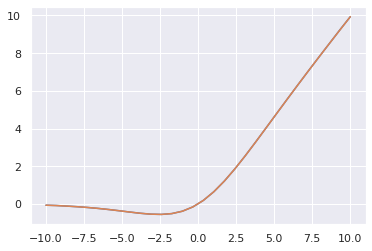

In [75]:
plt.plot(X_l,Y_l)
plt.plot(X_l,f(X_l))

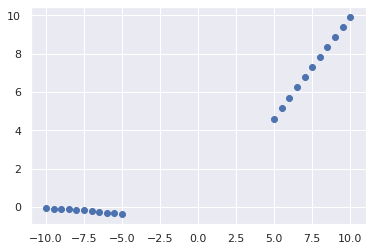

In [76]:
x2 = np.concatenate((np.linspace(-10,-5,11),np.linspace(5,10,11)))
y2 = x2/(1+np.exp(-x2/2))
plt.scatter(x2,y2)

In [77]:
X_l = np.linspace(-10,10,2000)
Y_l = np.sum([poly_lagrange(X_l, x2, y2, n) for n in range(1,len(x2),1)], axis=0)

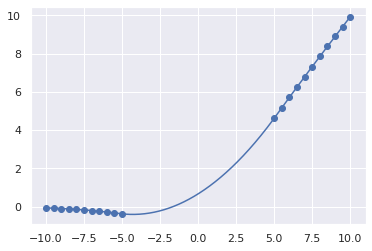

In [81]:
f = sp.interpolate.interp1d(x2, y2, kind='cubic')
plt.scatter(x2,y2)
# plt.plot(X_l, Y_l)
plt.plot(X_l, f(X_l))
# Cuando el comportamiento es bizarro... cuando hay funciones con muchas variaciones
# Muy costoso su calculo. -> n^2